In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
ds=pd.read_csv("F:\Resume project\Quantative analysis of Stocks\Dataset\stocks.csv")
ds.head(5)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [3]:
ds.shape

(248, 8)

In [4]:
ds.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Mean, Medain, Standard Deviation 

In [5]:
med= ds.groupby('Ticker')['Close'].median()
med

Ticker
AAPL    158.055000
GOOG    102.759998
MSFT    275.810013
NFLX    325.600006
Name: Close, dtype: float64

In [6]:
des=ds.groupby('Ticker')['Close'].describe()
des

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


Time Series Analysis

In [7]:
ds['Date']=pd.to_datetime(ds['Date'])


<function matplotlib.pyplot.show(close=None, block=None)>

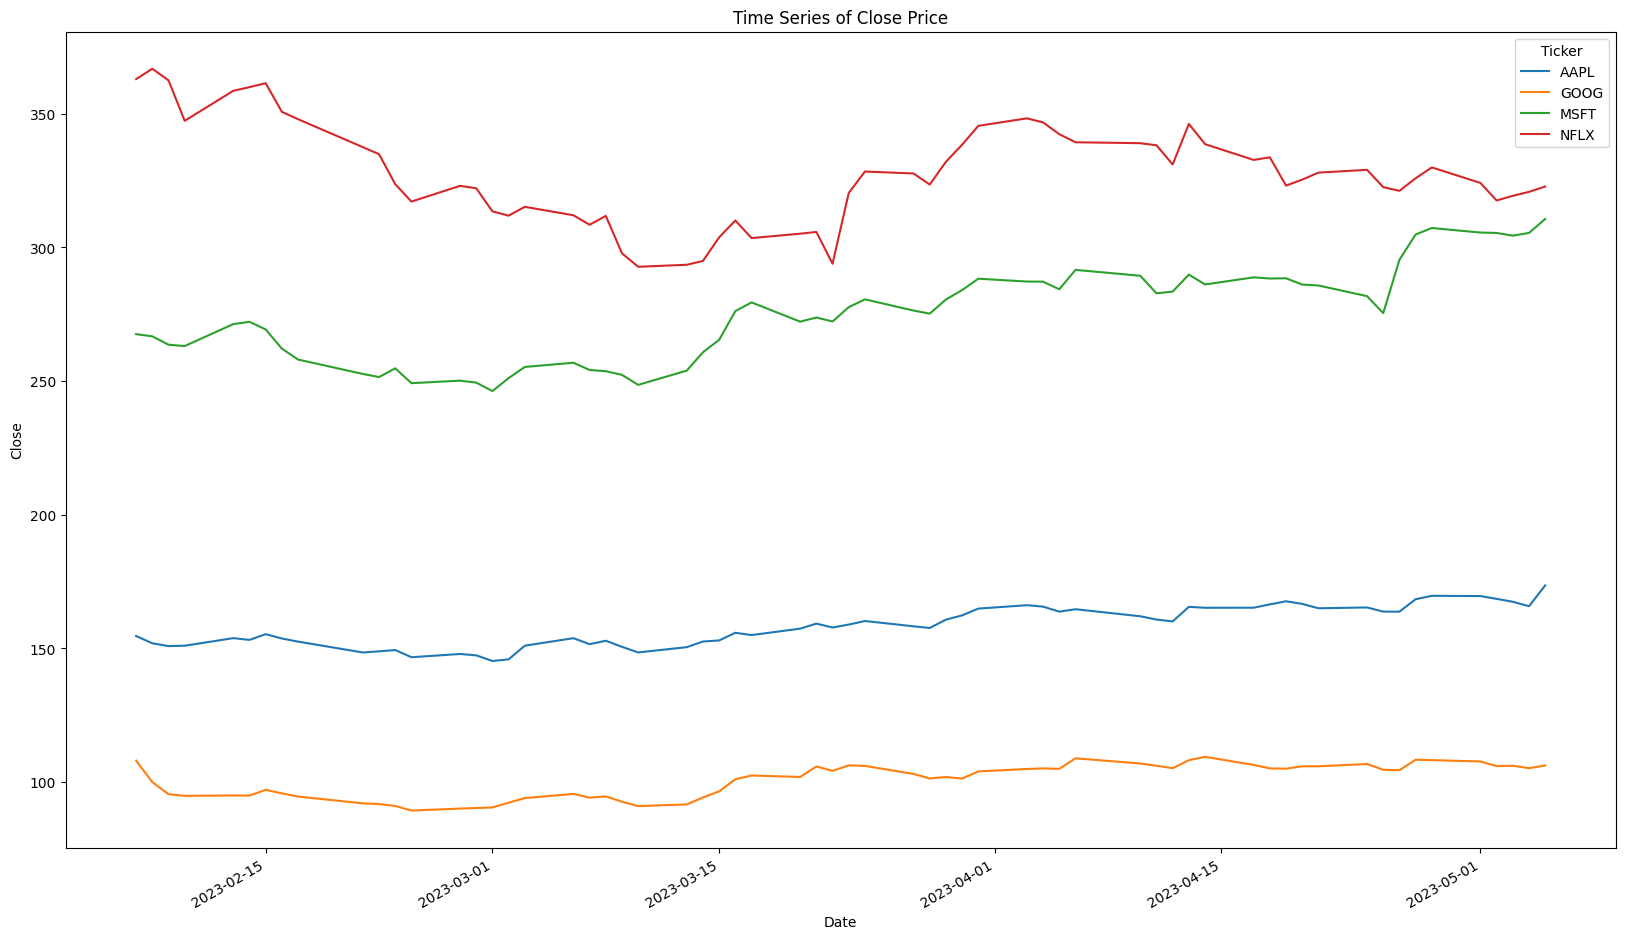

In [8]:
pt=ds.pivot_table(index='Date',columns='Ticker',values='Close')

pt.plot(kind='line',figsize= (20,12))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series of Close Price')
plt.legend(title='Ticker')
plt.show

Volatility Analysis

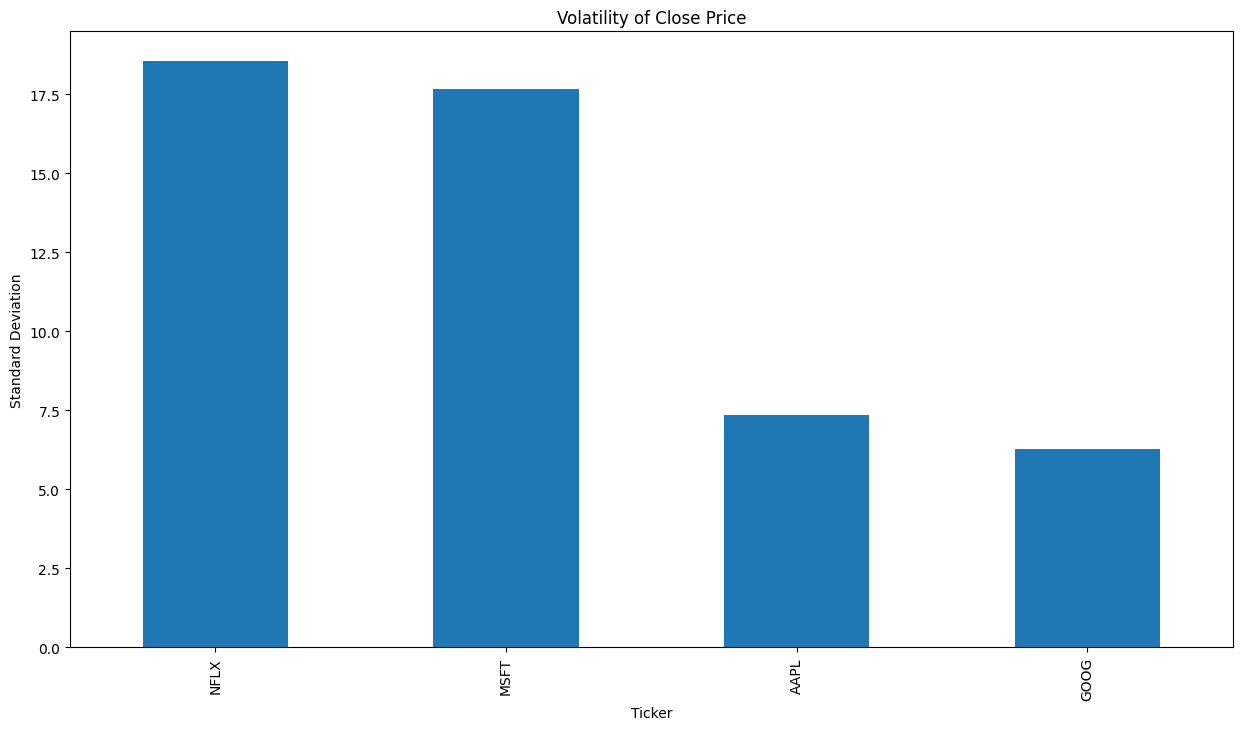

In [9]:
va=pt.std().sort_values(ascending=False)

va.plot(kind='bar',figsize=(15,8))
plt.xlabel('Ticker',)
plt.ylabel('Standard Deviation')
plt.title('Volatility of Close Price')
plt.show()


Correlation Analysis


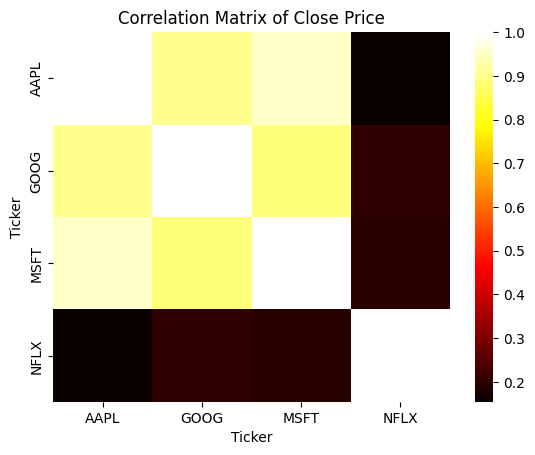

In [10]:
ca=pt.corr()
sns.heatmap(ca,cmap='hot')
#cbar=plt.colorbar()
#cbar.set_label('Correlation')
plt.title('Correlation Matrix of Close Price')
plt.xlabel('Ticker')
plt.ylabel('Ticker')
plt.show()

Comaparative Analysis


In [11]:
can=((pt.iloc[-1]-pt.iloc[0])/pt.iloc[0])*100
can

Ticker
AAPL    12.234086
GOOG    -1.689193
MSFT    16.104798
NFLX   -11.073151
dtype: float64

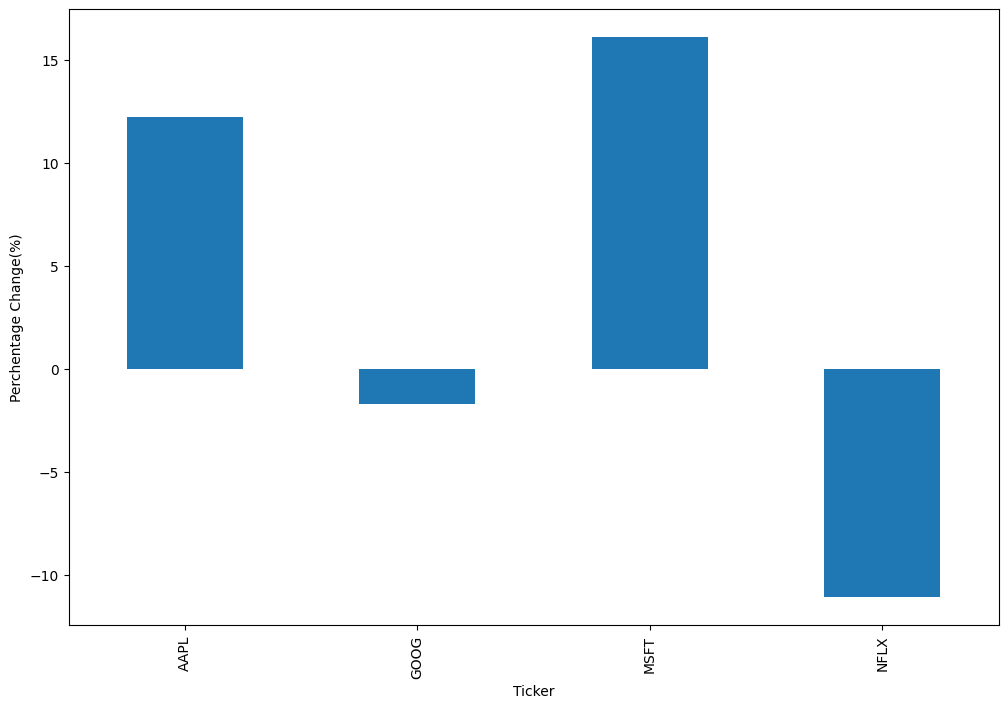

In [12]:
can.plot(kind='bar',figsize=(12,8))
plt.xlabel('Ticker')
plt.ylabel('Perchentage Change(%)')
plt.show()

Risk Return Analysis

In [13]:
dr= pt.pct_change().dropna()
dr.head(20)

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-08,-0.017653,-0.074417,-0.003102,0.010690
2023-02-09,-0.006912,-0.045400,-0.011660,-0.011804
2023-02-10,0.000928,-0.006285,-0.001972,-0.041766
2023-02-13,0.018807,0.001476,0.031243,0.032272
2023-02-14,-0.004225,-0.000526,0.003133,0.003876
2023-02-15,0.013903,0.022644,-0.010471,0.004056
2023-02-16,-0.010429,-0.013594,-0.026623,-0.029633
2023-02-17,-0.007547,-0.012424,-0.015602,-0.007841
2023-02-21,-0.026680,-0.026853,-0.020887,-0.030061


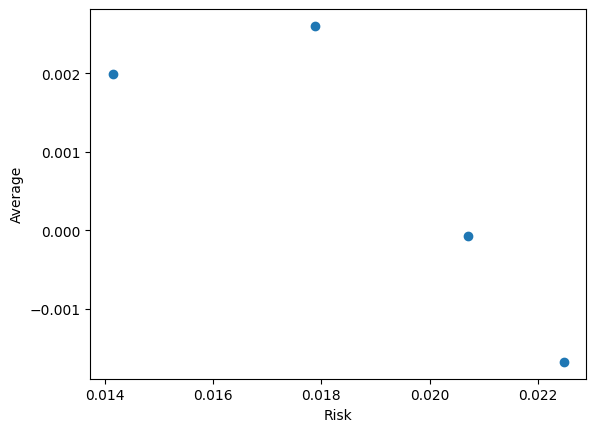

In [14]:
avg=dr.mean()
rt=dr.std()


risk_return_df = pd.DataFrame({'Risk': rt, 'Average Daily Return': avg})

plt.scatter(risk_return_df['Risk'],risk_return_df['Average Daily Return'])
plt.xlabel('Risk')
plt.ylabel('Average')
plt.show()